<a href="https://colab.research.google.com/github/RoselinSnehaJ/Yulu-project-Hypothesis-Testing/blob/main/Yulu%20-%20Hypothesis%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import f_oneway, shapiro, levene, probplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import skew, kurtosis
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv("/content/yulu.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Displaying the data type of each column in the "customers" table

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Finding the number of rows and columns in the dataset

In [ ]:
df.shape

(10886, 12)

Generating descriptive statistics of numerical data within a DataFrame.

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


To check for missing values and find the number of missing values in each column of a DataFrame, I used the isnull() function followed by the sum() function.

In [ ]:
null_values= df.isnull().sum()
null_values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

To ensure data integrity and reliability, it's essential to identify and eliminate duplicate entries within a DataFrame.

In [ ]:
duplicate = df[df.duplicated()]
remove_duplicates = df.drop_duplicates()
remove_duplicates

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


Understanding the distribution of data across numerical and categorical variables is fundamental in exploratory data analysis. It provides insights into the central tendency, spread, and frequency of different values within the dataset. Below are methods to analyze the distribution of numerical and categorical variables:

<ipython-input-10-943016339390>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist=True, kde=True, color='skyblue', hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})


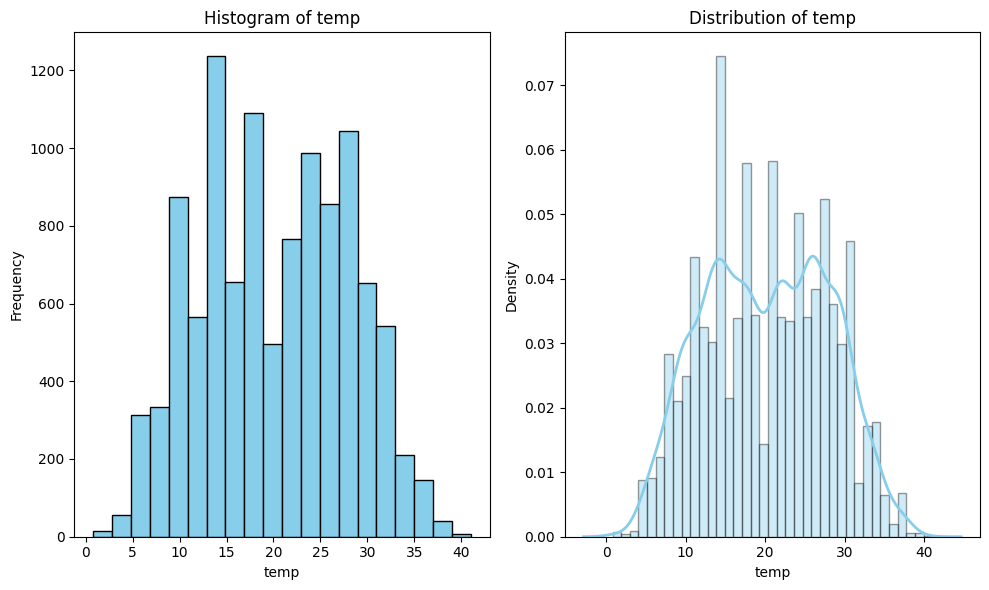

<ipython-input-10-943016339390>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist=True, kde=True, color='skyblue', hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})


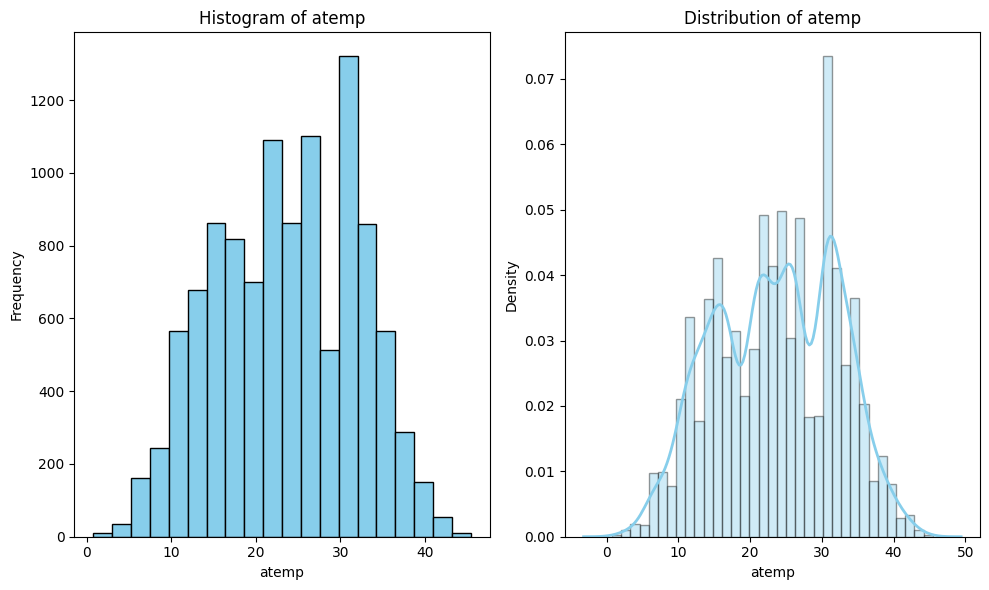

<ipython-input-10-943016339390>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist=True, kde=True, color='skyblue', hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})


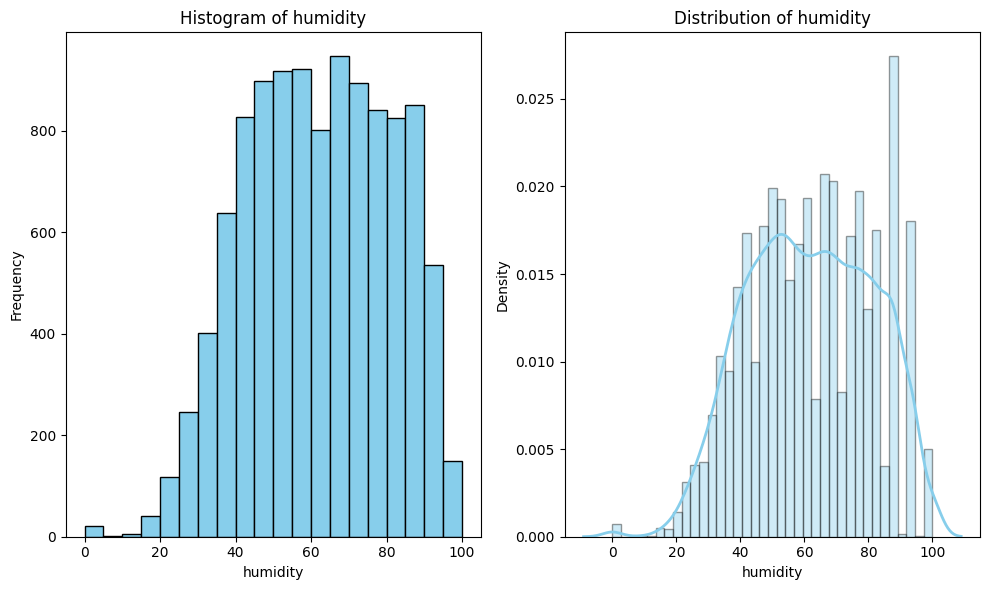

<ipython-input-10-943016339390>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist=True, kde=True, color='skyblue', hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})


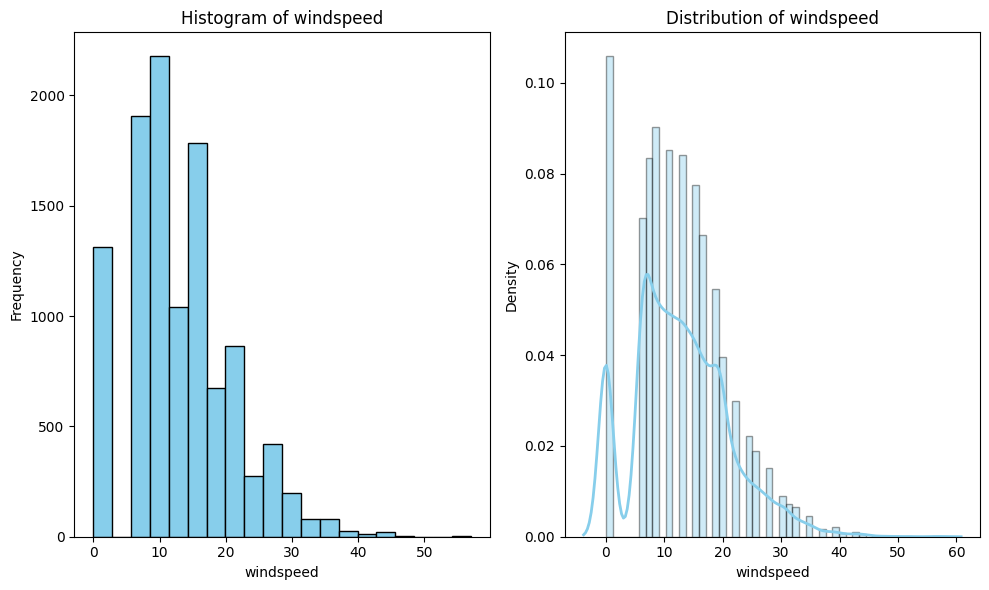

<ipython-input-10-943016339390>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist=True, kde=True, color='skyblue', hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})


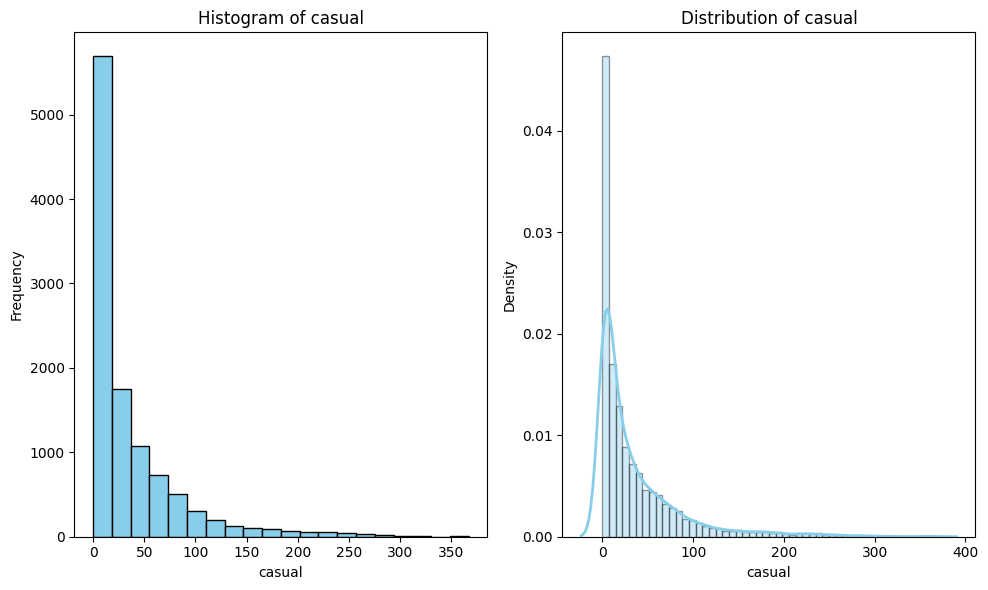

<ipython-input-10-943016339390>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist=True, kde=True, color='skyblue', hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})


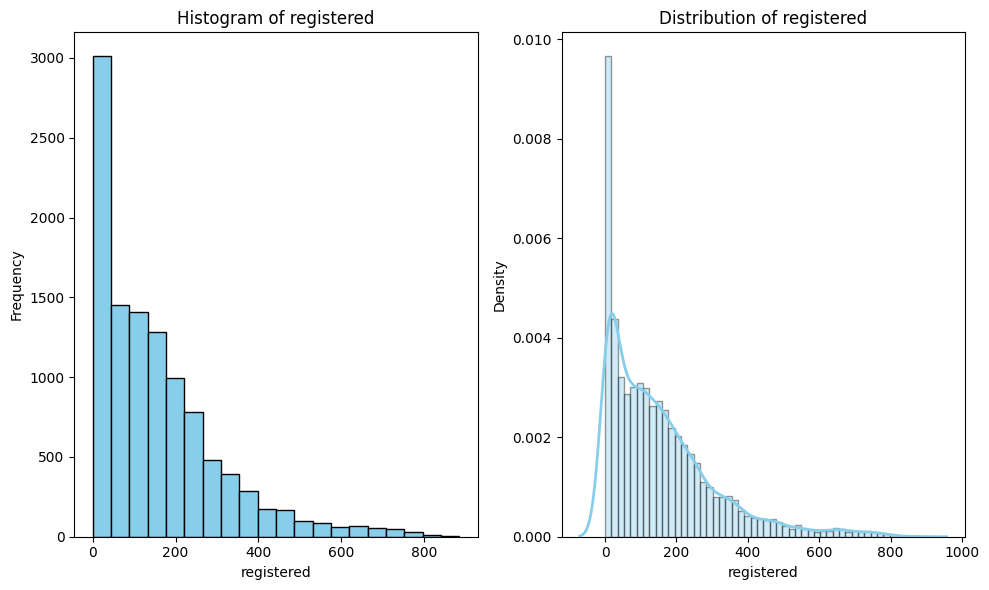

<ipython-input-10-943016339390>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist=True, kde=True, color='skyblue', hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})


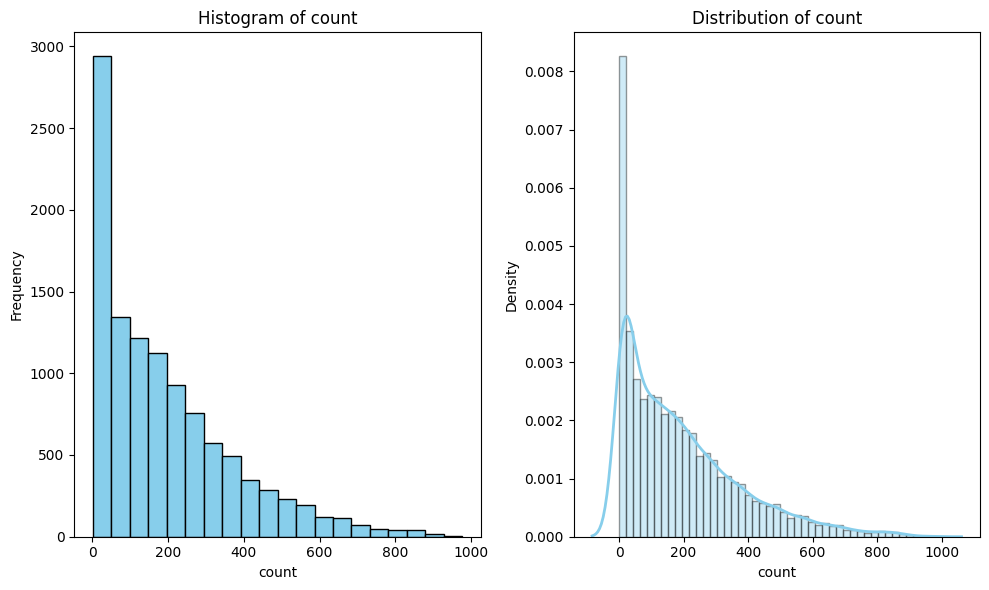

In [ ]:
# Selecting numerical columns
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Plotting histograms and distplots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Distribution plot
    plt.subplot(1, 2, 2)
    sns.distplot(df[col], hist=True, kde=True, color='skyblue', hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

<ipython-input-11-9eff04ab276b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


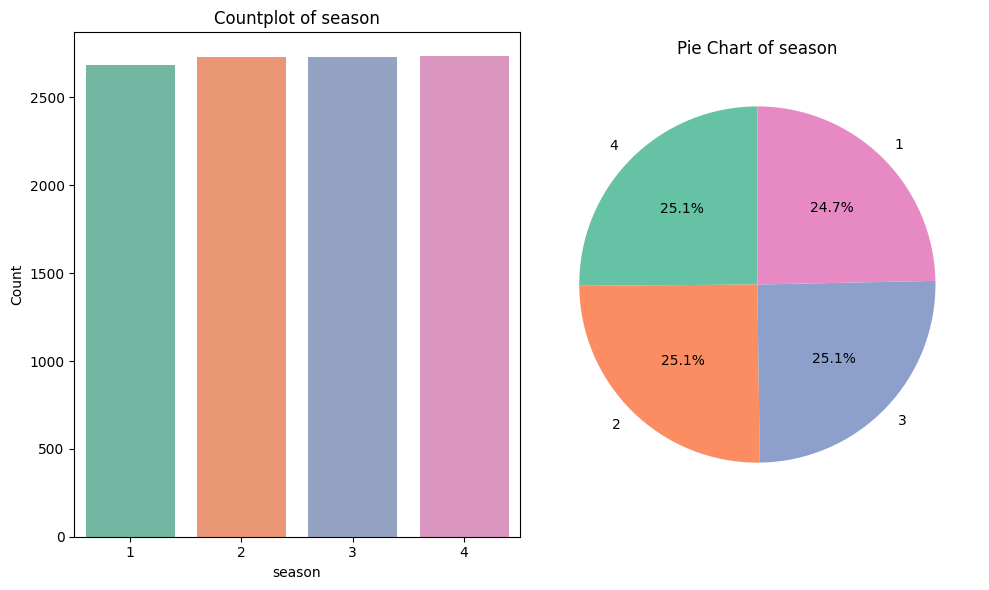

<ipython-input-11-9eff04ab276b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


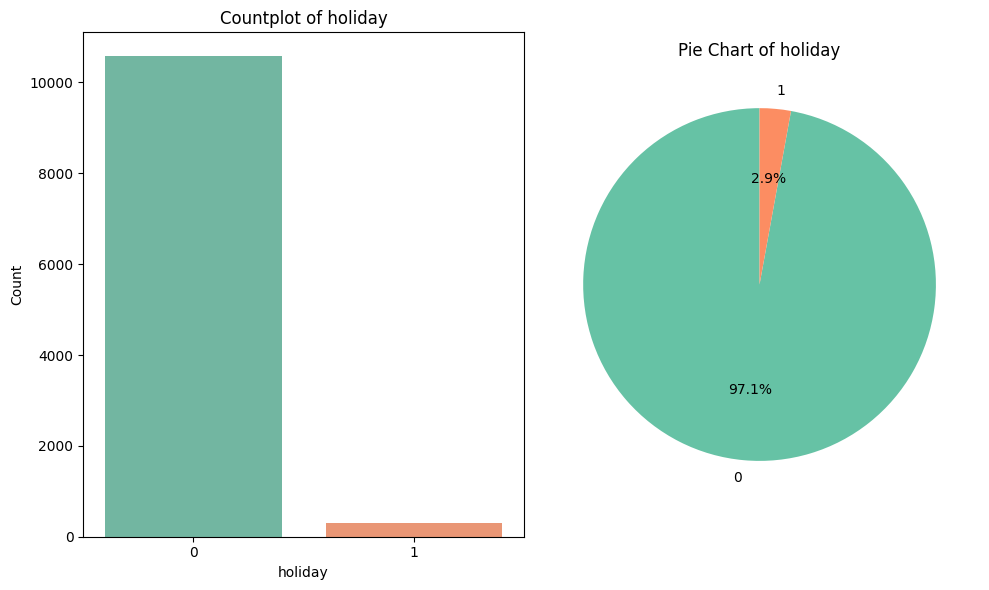

<ipython-input-11-9eff04ab276b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


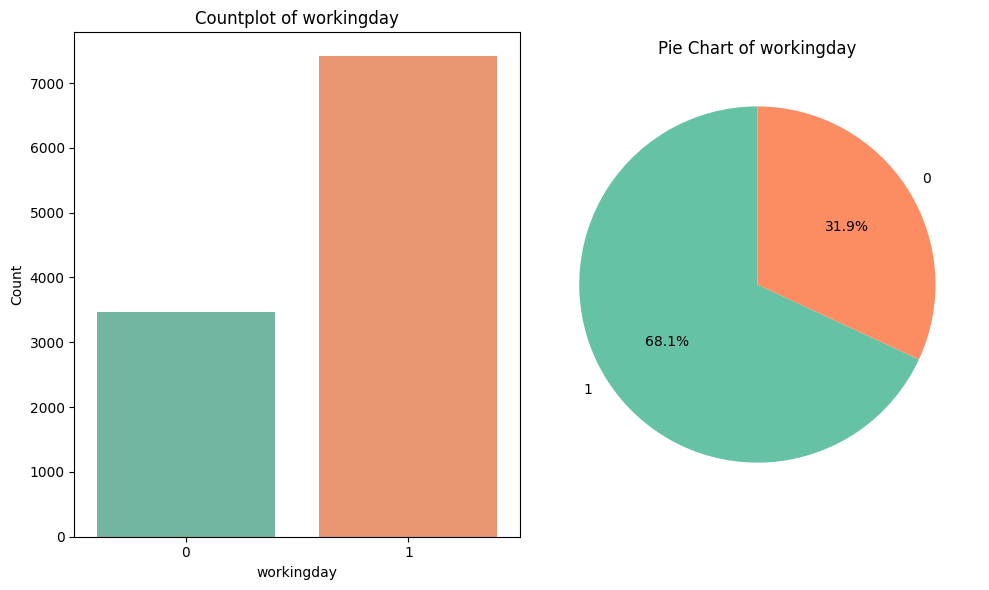

<ipython-input-11-9eff04ab276b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


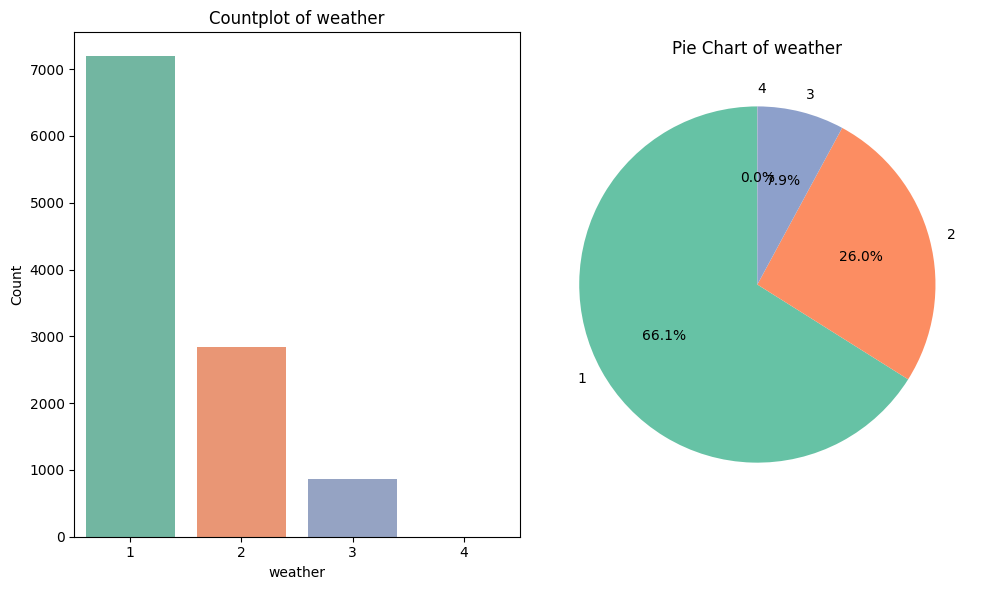

In [ ]:
# Selecting categorical columns
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

# Plotting countplots and pie charts for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))

    # Countplot
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title('Countplot of ' + col)
    plt.xlabel(col)
    plt.ylabel('Count')

    # Pie chart
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(df[col].unique())))
    plt.title('Pie Chart of ' + col)
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

Outliers, or extreme values, can significantly impact the analysis and interpretation of data. It's essential to identify and address outliers appropriately to ensure the accuracy and reliability of the analysis results. To check for outliers and to deal with them I used boxplot:

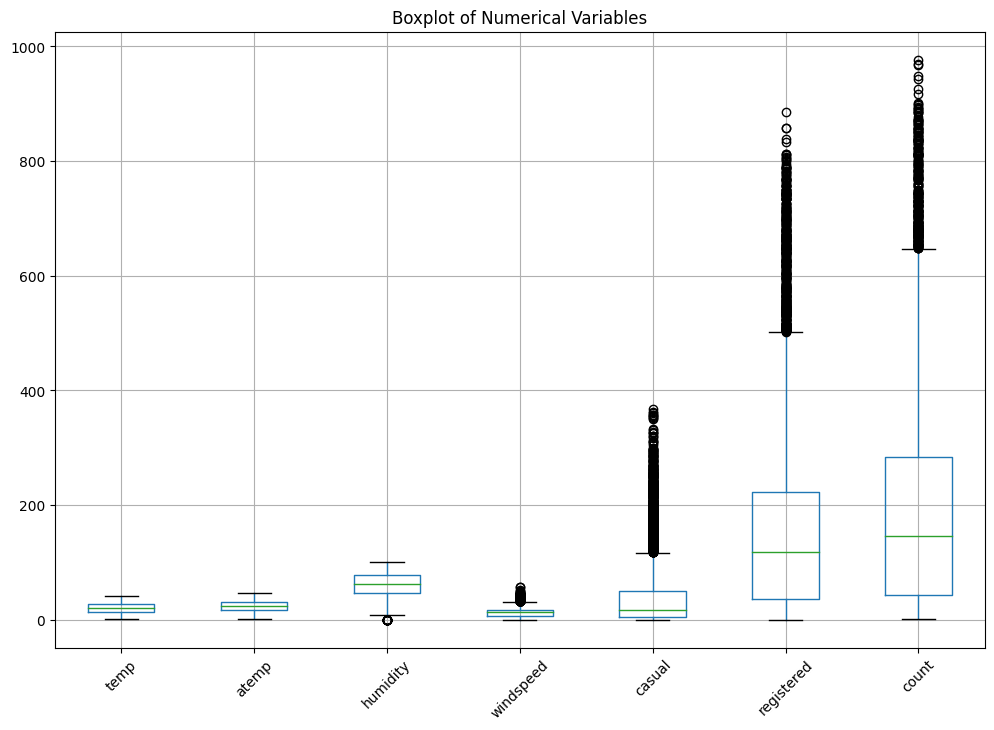

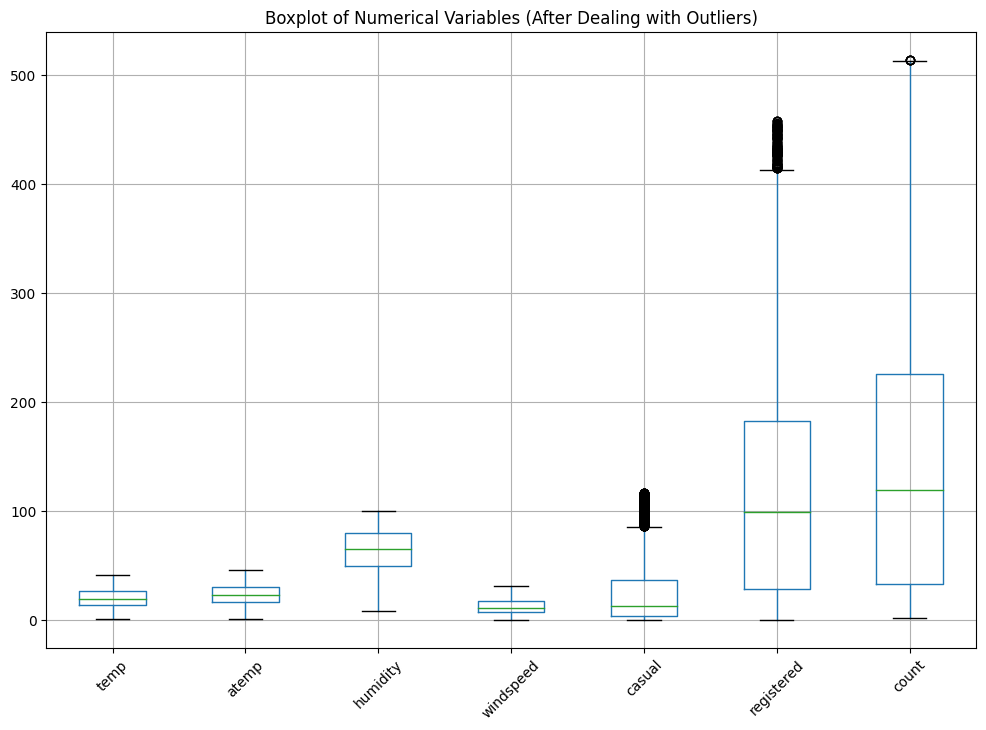

In [ ]:
# Selecting numerical columns to check for outliers
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Creating boxplots for each numerical column
plt.figure(figsize=(12, 8))
df[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

# Defining a function to detect and deal with outliers using IQR method
def deal_with_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Defining upper and lower bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Removing outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Iterate over numerical columns and deal with outliers
for col in numerical_columns:
    df = deal_with_outliers(df, col)

# After removing outliers, re-plotting the boxplots to confirm
plt.figure(figsize=(12, 8))
df[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Variables (After Dealing with Outliers)')
plt.xticks(rotation=45)
plt.show()

Understanding the relationships between dependent and independent variables is crucial in statistical analysis and modeling. It helps identify significant predictors and ensures the accuracy of predictive models. To establish these relationships I am plotting a Correlation Heatmap.A correlation heatmap provides a visual representation of the correlation coefficients between pairs of variables. It helps identify the strength and direction of the relationships between variables.

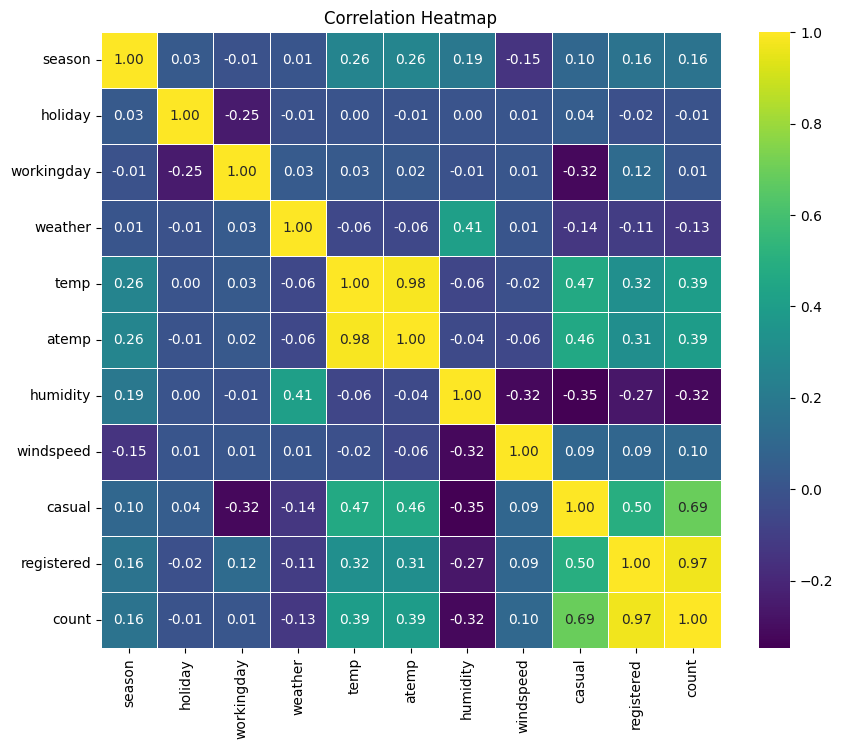

In [ ]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

# Drop non-numeric columns from the dataset
data_numeric = df.drop(columns=non_numeric_columns)

# Calculate the correlation matrix
correlation_matrix = data_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

To determine if there is a significant difference in the number of bike rides between weekdays and weekends, I conducted a two-sample independent t-test. Below are the steps involved in the analysis:

In [ ]:
#H0: There is no significant diff between no of bike rides on weekdays and weekends
#HA: There is a significant diff between no of bike rides on weekdays and weekends

In [ ]:
# Separate the data into weekdays and weekends
weekdays_data = df[df['workingday'] == 1]['count']
weekends_data = df[df['workingday'] == 0]['count']

# Perform 2-Sample Independent T-test
t_statistic, p_value = ttest_ind(weekdays_data, weekends_data)

# Print the test statistics and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Compare p-value with significance level (alpha)
alpha = 0.05
if p_value <= alpha:
    print("Reject the Null Hypothesis: There is a significant difference between the number of bike rides on weekdays and weekends.")
else:
    print("Fail to reject the Null Hypothesis: There is no significant difference between the number of bike rides on weekdays and weekends.")

T-statistic: 1.2096277376026694
P-value: 0.22644804226361348
Fail to reject the Null Hypothesis: There is no significant difference between the number of bike rides on weekdays and weekends.


Based on the analysis of the 2-Sample Independent T-test:

**Inference:**
The calculated p-value is compared to the significance level (alpha) of 0.05.
If the p-value is less than or equal to alpha (0.05), we reject the null hypothesis, indicating a significant difference between the number of bike rides on weekdays and weekends.
If the p-value is greater than alpha (0.05), we do not reject the null hypothesis, indicating no significant difference between the number of bike rides on weekdays and weekends.

**Conclusions:**
If the p-value is less than or equal to 0.05, we can conclude that there is a statistically significant difference between the number of bike rides on weekdays and weekends.
If the p-value is greater than 0.05, we do not have sufficient evidence to conclude that there is a significant difference between the number of bike rides on weekdays and weekends.

**Recommendations:**
If the null hypothesis is rejected (p-value <= 0.05), it suggests that there is a significant difference in the number of bike rides between weekdays and weekends.
In such a case, further investigation can be conducted to understand the factors contributing to the difference. For example, it could be due to differences in commuting patterns, leisure activities, or marketing strategies on weekdays versus weekends.
Based on the findings, appropriate strategies can be implemented to optimize bike rental services, such as adjusting bike availability, pricing, or promotions tailored to specific days of the week.
If the null hypothesis is not rejected (p-value > 0.05), it suggests that there is no significant difference in the number of bike rides between weekdays and weekends. In this case, efforts can be focused on maintaining consistent service levels across all days of the week without specific emphasis on weekdays or weekends.

To investigate whether the demand for bicycles on rent varies across different weather conditions, we'll conduct a **one-way ANOVA test**. Here's a breakdown of the analysis process:

In [ ]:
df.weather.value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [ ]:
weather_1 = df[df['weather'] == 1]['count']
weather_2 = df[df['weather'] == 2]['count']
weather_3 = df[df['weather'] == 3]['count']
weather_4 = df[df['weather'] == 4]['count']

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(weather_1, weather_2, weather_3, weather_4)

# Print the test statistics and p-value
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Compare p-value with significance level (alpha)
alpha = 0.05
if p_value <= alpha:
    print("Reject the Null Hypothesis: There is a significant difference in the demand for bicycles on rent across different weather conditions.")
else:
    print("Do not reject the Null Hypothesis: There is no significant difference in the demand for bicycles on rent across different weather conditions.")

F-statistic: 65.53024112793271
P-value: 5.482069475935669e-42
Reject the Null Hypothesis: There is a significant difference in the demand for bicycles on rent across different weather conditions.


Checking Assumptions of the Test:

<Figure size 1200x600 with 0 Axes>

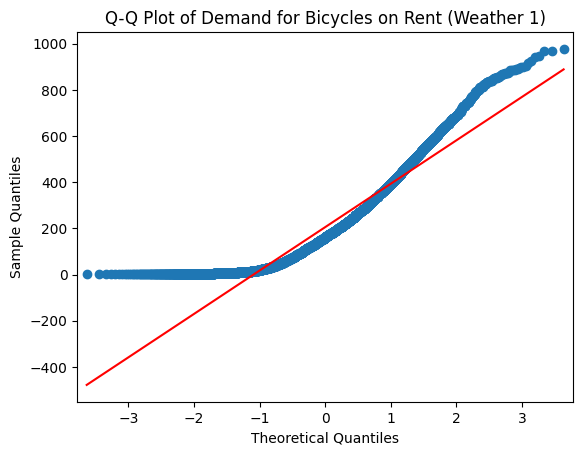

<Figure size 1200x600 with 0 Axes>

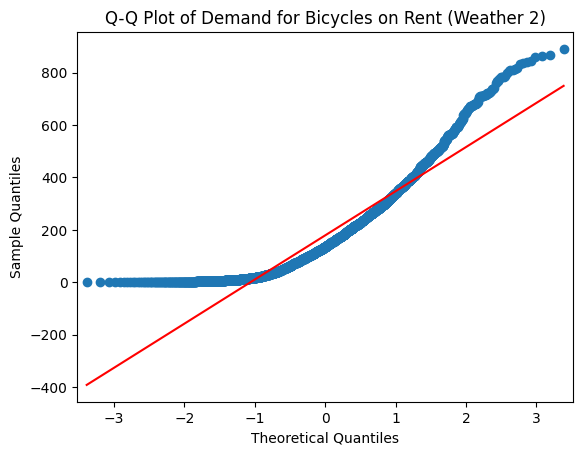

<Figure size 1200x600 with 0 Axes>

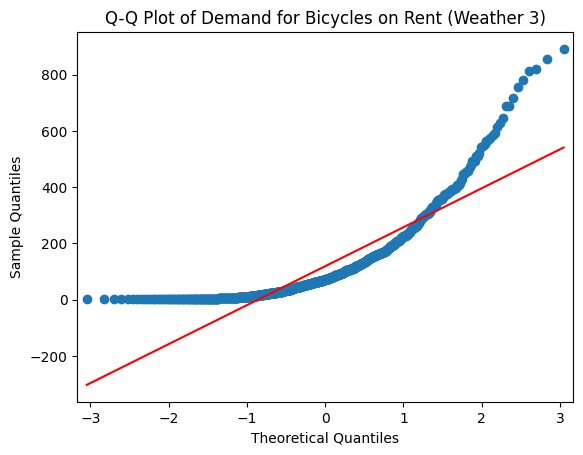

<Figure size 1200x600 with 0 Axes>

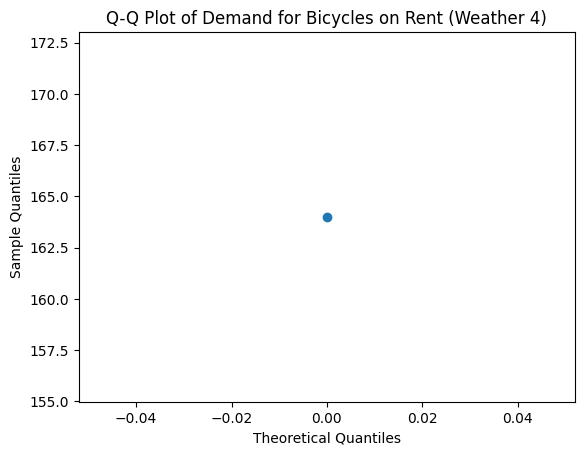

In [ ]:
# Select the 'count' column (demand for bicycles on rent) for each weather condition
weather_1 = df[df['weather'] == 1]['count']
weather_2 = df[df['weather'] == 2]['count']
weather_3 = df[df['weather'] == 3]['count']
weather_4 = df[df['weather'] == 4]['count']

# Plot Q-Q plots for each weather condition
plt.figure(figsize=(12, 6))
qqplot(weather_1, line='s')
plt.title('Q-Q Plot of Demand for Bicycles on Rent (Weather 1)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

plt.figure(figsize=(12, 6))
qqplot(weather_2, line='s')
plt.title('Q-Q Plot of Demand for Bicycles on Rent (Weather 2)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

plt.figure(figsize=(12, 6))
qqplot(weather_3, line='s')
plt.title('Q-Q Plot of Demand for Bicycles on Rent (Weather 3)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

plt.figure(figsize=(12, 6))
qqplot(weather_4, line='s')
plt.title('Q-Q Plot of Demand for Bicycles on Rent (Weather 4)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [ ]:

# Compute skewness and kurtosis for each weather condition
skewness_1 = skew(weather_1)
kurtosis_1 = kurtosis(weather_1)
skewness_2 = skew(weather_2)
kurtosis_2 = kurtosis(weather_2)
skewness_3 = skew(weather_3)
kurtosis_3 = kurtosis(weather_3)
skewness_4 = skew(weather_4)
kurtosis_4 = kurtosis(weather_4)

print("Weather 1 - Skewness:", skewness_1, " Kurtosis:", kurtosis_1)
print("Weather 2 - Skewness:", skewness_2, " Kurtosis:", kurtosis_2)
print("Weather 3 - Skewness:", skewness_3, " Kurtosis:", kurtosis_3)
print("Weather 4 - Skewness:", skewness_4, " Kurtosis:", kurtosis_4)

Weather 1 - Skewness: 1.1396195185041555  Kurtosis: 0.9632151489948488
Weather 2 - Skewness: 1.293759189703101  Kurtosis: 1.5835130178554868
Weather 3 - Skewness: 2.1833160390123187  Kurtosis: 5.961191782478394
Weather 4 - Skewness: nan  Kurtosis: nan


In [ ]:
statistic, p_value = levene(weather_1, weather_2, weather_3, weather_4)

# Print the results
print("Levene's Test for Equality of Variance:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

Levene's Test for Equality of Variance:
Test Statistic: 54.85106195954556
p-value: 3.504937946833238e-35


In this code:

* We perform Levene's test to assess whether the variances of the demand for bicycles on rent are equal across different weather conditions.
* The test statistic and p-value are provided.
* If the p-value is greater than the chosen significance level, we fail to reject the null hypothesis, indicating that the variances are equal across groups.
* If the p-value is less than or equal to the significance level, we reject the null hypothesis, suggesting that the variances are not equal across groups.

Based on the analysis, if we find evidence to reject the null hypothesis, it implies that weather conditions significantly influence the demand for bicycles on rent. This information can be leveraged to implement targeted strategies such as:

**Weather-based Pricing:** Adjust rental rates based on weather conditions, with potentially higher rates during favorable weather to capitalize on increased demand.

**Inventory Management:** Maintain an appropriate inventory of bicycles, ensuring an adequate supply during periods of high demand influenced by weather conditions.

**Marketing and Promotions:** Develop weather-specific marketing campaigns and promotions to attract customers. For instance, offering discounts on rainy days or promoting leisurely rides during sunny weather.

**Service Enhancements:** Introduce weather-related services or accessories, such as rain gear or sun protection, to cater to customers' needs and preferences.

**Analyzing Bicycle Rental Demand Across Seasons:**

**Formulating Null Hypothesis (H0) and Alternate Hypothesis (H1)**

H0: The demand for bicycles on rent is the same across different seasons

H1: The demand for bicycles on rent varies across different seasons

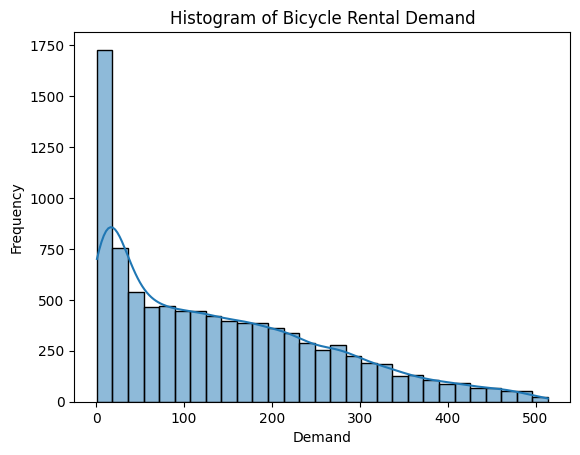

In [ ]:
# Histogram
sns.histplot(df['count'], kde=True)
plt.title('Histogram of Bicycle Rental Demand')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.show()



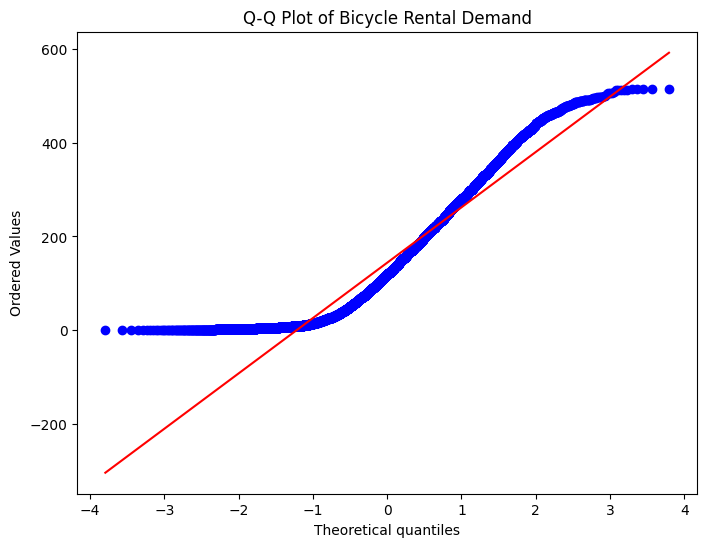

Shapiro-Wilk test p-value: 0.0
The data does not follow a normal distribution (reject H0).


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Q-Q Plot
plt.figure(figsize=(8, 6))
probplot(df['count'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Bicycle Rental Demand')
plt.show()

# Shapiro-Wilk’s test for normality
stat, p = shapiro(df['count'])
print('Shapiro-Wilk test p-value:', p)
if p < 0.05:
    print('The data does not follow a normal distribution (reject H0).')
else:
    print('The data follows a normal distribution (fail to reject H0).')



In [ ]:
# ii. Equality Variance
# Levene’s test

# Levene’s test for equality of variance
stat, p = levene(df['count'][df['season'] == 1],
                 df['count'][df['season'] == 2],
                 df['count'][df['season'] == 3],
                 df['count'][df['season'] == 4])
print('Levene test p-value:', p)
if p < 0.05:
    print('The variances are not equal (reject H0).')
else:
    print('The variances are equal (fail to reject H0).')

# d. Set a significance level and Calculate the test Statistics / p-value.
alpha = 0.05

# One-way ANOVA test
stat, p = f_oneway(df['count'][df['season'] == 1],
                   df['count'][df['season'] == 2],
                   df['count'][df['season'] == 3],
                   df['count'][df['season'] == 4])

# e. Decide whether to accept or reject the Null Hypothesis.
print('ANOVA test p-value:', p)
if p < alpha:
    print('Reject the null hypothesis. There is evidence that the demand for bicycles on rent varies across different seasons.')
else:
    print('Fail to reject the null hypothesis. There is no evidence that the demand for bicycles on rent varies across different seasons.')

Levene test p-value: 1.4156739715299946e-85
The variances are not equal (reject H0).
ANOVA test p-value: 9.583582124778882e-94
Reject the null hypothesis. There is evidence that the demand for bicycles on rent varies across different seasons.


**Recommendations based on the analysis of bicycle rental demand across seasons:**

**Seasonal Marketing Strategies:** Develop targeted marketing campaigns tailored to each season to capitalize on the varying demand patterns. For example, focus on promoting outdoor activities during warmer seasons and emphasize convenience and accessibility during colder seasons.

**Weather-based Adjustments:** Monitor weather forecasts and adjust operations accordingly. Prepare for increased demand during favorable weather conditions and implement contingency plans for adverse weather to minimize disruptions to service.

**Collaborations and Partnerships:** Explore collaborations with local businesses or tourism agencies to promote bicycle rentals as part of seasonal packages or experiences. Partnering with hotels, resorts, or event organizers can help reach new customers and increase rental demand.

**Customer Engagement:** Foster customer loyalty and engagement through personalized offers, rewards programs, and communication channels. Tailor promotions and discounts to align with seasonal preferences and encourage repeat business.

Utilised the chi-square test for independence to determine if there is a significant association between weather conditions and seasons. Based on the p-value obtained from the test, a decision is made whether to accept or reject the null hypothesis.

In [ ]:
# Creating contingency table against 'Weather' & 'Season' columns
contingency_table = pd.crosstab(df['weather'], df['season'])

# Significance level
alpha = 0.05

# Calculating the test statistics and p-value
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Deciding whether to accept or reject the Null Hypothesis
print('Chi-square test p-value:', p)
if p < alpha:
    print('Reject the null hypothesis. There is evidence that weather conditions are significantly different during different seasons.')
else:
    print('Fail to reject the null hypothesis. There is no evidence that weather conditions are significantly different during different seasons.')

Chi-square test p-value: 7.37899576712981e-08
Reject the null hypothesis. There is evidence that weather conditions are significantly different during different seasons.


**Inferences & Recommendations:**

**Inferences:**
Based on the chi-square test for independence, we find that the p-value is less than the significance level (alpha) of 0.05. Therefore, we reject the null hypothesis.
This result suggests that there is evidence to support the idea that weather conditions are significantly different during different seasons.

**Recommendations:**
Seasonal Preparation: Businesses should consider adapting their operations and offerings to align with the varying weather conditions across seasons. For example, during colder seasons, they can focus on promoting indoor activities or provide cold-weather gear for outdoor enthusiasts.

**Marketing Strategies:** Tailor marketing campaigns and promotions to capitalize on the association between weather and seasons. For instance, emphasize outdoor activities and promotions during seasons with favorable weather conditions to attract more customers.

**Inventory Management:** Adjust inventory levels and product offerings based on seasonal weather patterns. For instance, stock up on items such as umbrellas or sunscreen during seasons with higher demand due to specific weather conditions.

**Customer Experience:** Enhance the overall customer experience by providing relevant information and services based on weather forecasts. For instance, offer weather updates and recommendations on suitable activities or products based on the prevailing weather conditions.

**Data Utilization:** Continuously analyze weather data and rental trends to identify patterns and opportunities for optimization. Utilize this information to make informed decisions regarding resource allocation, pricing strategies, and marketing efforts.

**Partnerships and Collaborations:** Explore partnerships with weather-related services or businesses to provide added value to customers. For example, collaborate with weather forecasting services to offer customized recommendations or discounts based on upcoming weather conditions.

**Business Recommendations:**


Analysis reveals a peak in ride bookings during office opening and closing hours, indicating a predominant audience of working-class individuals. Consequently, Yulu could consider partnering with organizations or offering tailored promotions to appeal to this demographic.


The data suggests a higher frequency of Yulu bookings from June to October, implying a preference for Yulu rides during the summer season.


Findings indicate that the distinction between workdays and non-workdays does not significantly influence the number of cycles rented.


The analysis highlights a correlation between seasonality and the volume of cycle rentals.


Weather conditions emerge as a determinant factor affecting the demand for cycle rentals.


It is observed that weather patterns vary with the seasons, suggesting a seasonal dependency between weather and cycle rental demand.